# E-commarce sales Forecasting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [2]:
df = pd.read_csv("./Data/SampleSuperstore.csv", encoding='ISO-8859-1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12/06/2016,16/06/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
df.isna().any()

Row ID           False
Order ID         False
Order Date       False
Ship Date        False
Ship Mode        False
Customer ID      False
Customer Name    False
Segment          False
Country          False
City             False
State            False
Postal Code      False
Region           False
Product ID       False
Category         False
Sub-Category     False
Product Name     False
Sales            False
Quantity         False
Discount         False
Profit           False
dtype: bool

In [5]:
df["Row ID"].duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Name: Row ID, Length: 9994, dtype: bool

In [6]:
df["Order ID"].duplicated().sum()

np.int64(4985)

In [7]:
Total_Orders = df["Order ID"].count()
Total_Orders

np.int64(9994)

In [8]:
df.groupby("Order Date")["Order ID"].count()

Order Date
01/01/2017    10
01/02/2014     1
01/02/2016     2
01/03/2014    10
01/03/2015     7
              ..
31/10/2016     8
31/10/2017     3
31/12/2014    14
31/12/2015    11
31/12/2016     7
Name: Order ID, Length: 1237, dtype: int64

In [9]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d/%m/%Y")
OrdercountByYear = df.groupby(df["Order Date"].dt.year)["Order ID"].count()
OrdercountByYear

Order Date
2014    1993
2015    2102
2016    2587
2017    3312
Name: Order ID, dtype: int64

In [10]:
SalesByYear = df.groupby(df["Order Date"].dt.year)["Sales"].sum()
SalesByYear

Order Date
2014    484247.4981
2015    470532.5090
2016    609205.5980
2017    733215.2552
Name: Sales, dtype: float64

In [11]:
ProfitByYear = df.groupby(df["Order Date"].dt.year)["Profit"].sum()
ProfitByYear

Order Date
2014    49543.9741
2015    61618.6037
2016    81795.1743
2017    93439.2696
Name: Profit, dtype: float64

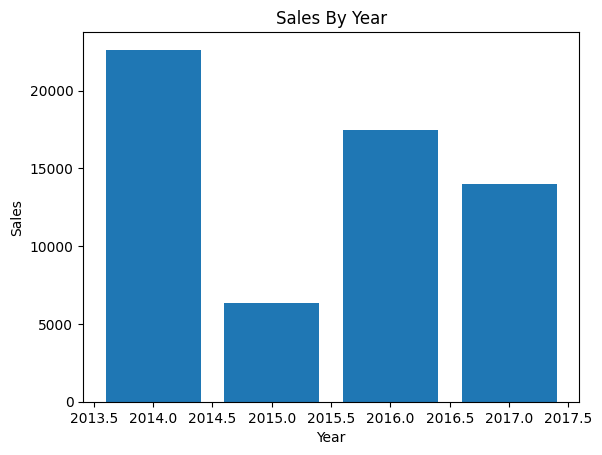

In [12]:
plt.bar(df["Order Date"].dt.year,df["Sales"])
plt.title("Sales By Year")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

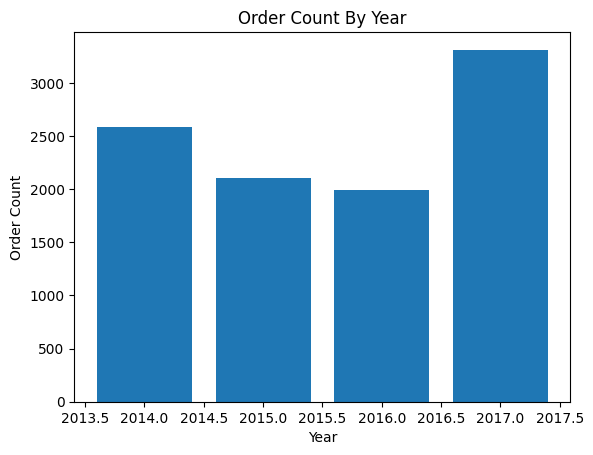

In [13]:
X = df["Order Date"].dt.year.unique()
Y = OrdercountByYear.values
plt.bar(X,Y)
plt.title("Order Count By Year")
plt.xlabel("Year")
plt.ylabel("Order Count")
plt.show()

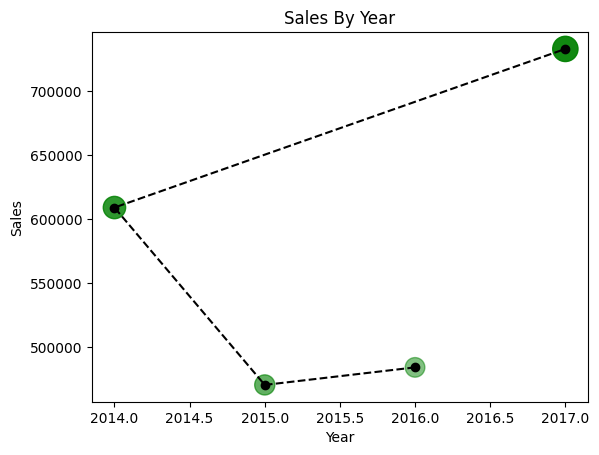

In [14]:
X = X = df["Order Date"].dt.year.unique()
Y = SalesByYear.values
Size = OrdercountByYear.values
Color = ProfitByYear.values
plt.scatter(X,Y,s=Size*0.1,alpha=Color*0.00001, c="green")
plt.plot(X, SalesByYear.values, c='black', marker='o', linestyle = "--")
plt.title("Sales By Year")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

In [15]:
SalesByRegion = df.groupby(df["Region"])["Sales"].sum()
SalesByRegion 

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

In [16]:
ProfitByRegion = df.groupby(df["Region"])["Profit"].sum()
ProfitByRegion 

Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64

In [17]:
OrderCountByRegion =df.groupby(df["Region"])["Order ID"].count()
OrderCountByRegion 

Region
Central    2323
East       2848
South      1620
West       3203
Name: Order ID, dtype: int64

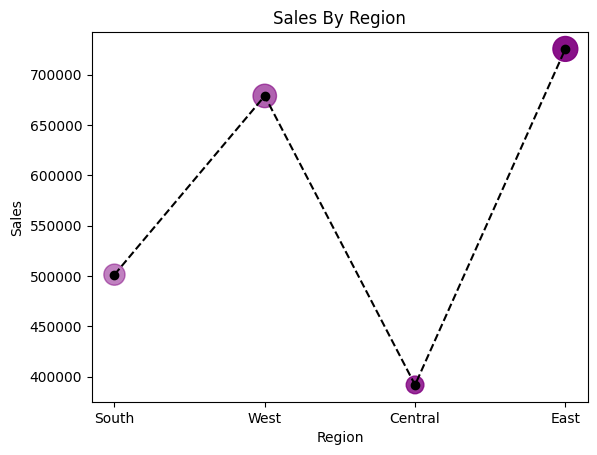

In [18]:
X = X = df["Region"].unique()
Y = SalesByRegion.values
Size = OrderCountByRegion.values
Color = ProfitByYear.values
plt.scatter(X,Y,s=Size*0.1,alpha=Color*0.00001,c='purple')
plt.plot(X, SalesByRegion.values, c='black', marker='o', linestyle = "--")
plt.title("Sales By Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()

In [19]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,16/06/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Create 3D Graphs

In [20]:
# setting up 3D Figure
fig = plt.Figure(figsize=(10,6))
ax = fig.add_subplot(111, projection= '3d')

# Scatter plot with color mapping
ax.scatter(SalesByYear ,SalesByRegion, ProfitByRegion, c= ProfitByYear,  cmap='coolwarm', s=100)

# Labels
ax.set_xlabel('SalesByYear')
ax.set_ylabel('SalesByRegion')
ax.set_zlabel('ProfitByRegion')


plt.show()

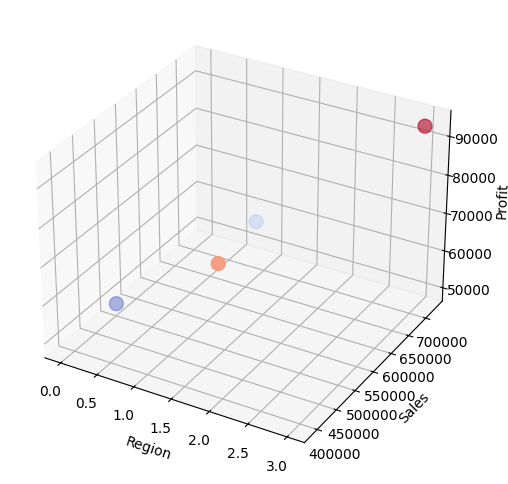

In [21]:
# 3d figure for (Region, Sales, Profit)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
region_indices = [0, 1, 2, 3]  # indices for regions: North=0, South=1, etc.
ax.scatter(region_indices, SalesByRegion, ProfitByYear, c= ProfitByYear, cmap= 'coolwarm', s = 100 )

ax.set_xlabel('Region')
ax.set_ylabel('Sales')
ax.set_zlabel('Profit')

plt.show()


